In [137]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests


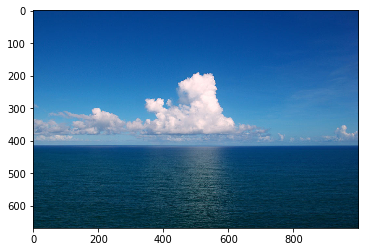

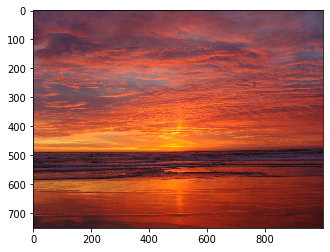

In [138]:
url = r'https://github.com/jrosebr1/color_transfer/blob/master/images/ocean_day.jpg?raw=true'
r = requests.get(url, stream=True).raw
source = np.asarray(bytearray(r.read()), dtype="uint8")
source = cv2.imdecode(source, cv2.IMREAD_COLOR)
# source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)

url = r'https://github.com/jrosebr1/color_transfer/blob/master/images/ocean_sunset.jpg?raw=true'
r = requests.get(url, stream=True).raw
target = np.asarray(bytearray(r.read()), dtype="uint8")
target = cv2.imdecode(target, cv2.IMREAD_COLOR)
# target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)

plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(target, cv2.COLOR_BGR2RGB))
plt.show()

In [139]:
def image_stats(img):
    l,a,b = cv2.split(img)
    output = np.zeros((3,2))
    for index, i in enumerate([l,a,b]):
        output[index][0] = i.mean()
        output[index][1] = i.std()
    return output

def color_transfer(source_img, target_img, color_space, alpha=0.4):
    source_stat = image_stats(source_img)
    target_stat = image_stats(target_img)
    c1, c2, c3 = cv2.split(target_img)
    combined = [c1, c2, c3]
    output = []
    for index in range(len(combined)):
        i = combined[index] * alpha
        i = (i - target_stat[index][0]) * alpha
        i *= (target_stat[index][1] / source_stat[index][1]) * alpha
        i += (source_stat[index][0] ) * alpha
        i = i + combined[index] * (1 - alpha)
#         i = (i - i.min()) * 100 / (i.max() - i.min())
        output.append(i)
    output = cv2.merge(output)
    output = cv2.cvtColor(output.astype('uint8'), color_space)
    return output
        

In [140]:
hsv_source = cv2.cvtColor(source, cv2.COLOR_RGB2HSV)
hsv_target = cv2.cvtColor(target, cv2.COLOR_RGB2HSV)
lab_source = cv2.cvtColor(source, cv2.COLOR_BGR2LAB)
lab_target = cv2.cvtColor(target, cv2.COLOR_BGR2LAB)

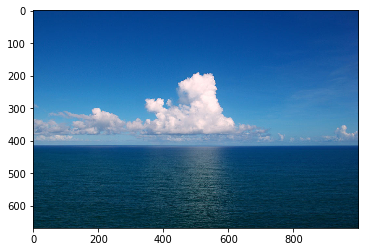

In [141]:
plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))

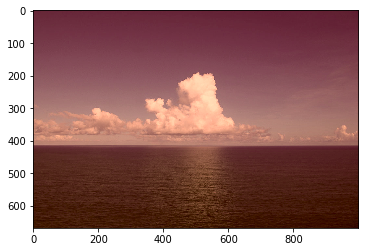

In [142]:
plt.imshow(color_transfer(lab_target, lab_source, cv2.COLOR_LAB2RGB, 0.9))
plt.savefig("output/target1.png")

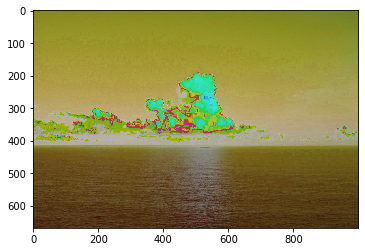

In [143]:
plt.imshow(color_transfer(hsv_target, hsv_source, cv2.COLOR_HSV2BGR, 0.9))
plt.savefig("output/hsv_target1.png")

In [144]:
source_label = np.loadtxt('source_label.txt',delimiter=',').astype('uint8')
target_label = np.loadtxt('target_label.txt',delimiter=',').astype('uint8')
segmented_source = {}
segmented_target = {}
for j in np.unique(source_label):
    segmented_source[j] = [[]]
    segmented_target[j] = [[]]
for i in range(len(source_label)):
    for j in range(len(source_label[i])):
        segmented_source[source_label[i][j]][0].append(lab_source[i][j])
for i in range(len(target_label)):
    for j in range(len(target_label[i])):
        segmented_source[target_label[i][j]][0].append(lab_target[i][j])